In [1]:
from align import detect_face
import tensorflow as tf
from scipy import misc
import numpy as np
from PIL import Image, ImageDraw 
import facenet

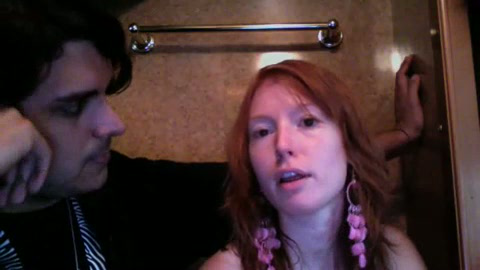

In [2]:
image_size = 160
margin = 32

minsize = 20 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor

input_img = "/dataset/frame_images_DB/Alicia_Witt/5/5.2247.jpg"
output_img = "/output/Alicia_Witt_5_2247"
display(Image.open(input_img, 'r'))

facenet_model_path = "/models"

In [4]:
with tf.Graph().as_default():
    with tf.Session() as sess:
        pnet, rnet, onet = detect_face.create_mtcnn(sess, None)

        img = misc.imread(input_img)
        img_size = img.shape[0:2]
        print(img.shape)

        bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)
        print(bounding_boxes)
        print("")

(270, 480, 3)
[[242.34087761  79.85525751 346.28145804 211.72812501   0.99778193]
 [ 22.71019481  47.14243581 130.7080562  190.65636591   0.98890346]]



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [5]:
source_img = Image.open(input_img, 'r')
draw_over = ImageDraw.Draw(source_img)
for i, det in enumerate(bounding_boxes):
    det = np.squeeze(det)
    bb = np.zeros(4, dtype=np.int32)
    bb[0] = np.maximum(det[0]-margin/2, 0)
    bb[1] = np.maximum(det[1]-margin/2, 0)
    bb[2] = np.minimum(det[2]+margin/2, img_size[1])
    bb[3] = np.minimum(det[3]+margin/2, img_size[0])
    print(bb)
    draw_over.rectangle([bb[0],bb[1],bb[2],bb[3]], outline="red")
    cropped = img[bb[1]:bb[3],bb[0]:bb[2],:]
    scaled = misc.imresize(cropped, (image_size, image_size), interp='bilinear')
    filename_base = output_img + "_" + str(i) + ".jpg"
    misc.imsave(filename_base, scaled)

source_img.save(output_img + "_boxes.jpg", "JPEG")

[226  63 362 227]
[  6  31 146 206]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app


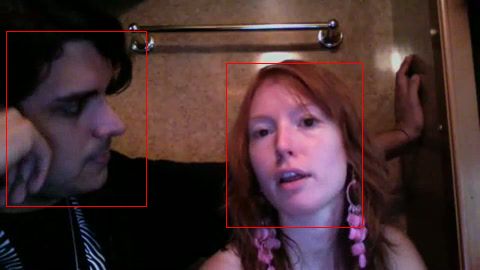

In [6]:
display(source_img)

In [11]:
with tf.Graph().as_default():
    with tf.Session() as sess:
        facenet.load_model(facenet_model_path)
        embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
        print(embeddings)

Model directory: /models
Metagraph file: model-20180402-114759.meta
Checkpoint file: model-20180402-114759.ckpt-275
INFO:tensorflow:Restoring parameters from /models/model-20180402-114759.ckpt-275
Tensor("embeddings:0", shape=(?, 512), dtype=float32)
